In [2]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

df = pd.read_csv("News description 20000.csv",encoding="latin-1")
column1 = df["S.NO"].tolist()
column2 = df["short_description"].tolist()




text_data = [f"{c1} {c2}" for c1, c2 in zip(column1, column2)]

# Tokenize and encode the text data
encoded_inputs = tokenizer(text_data, padding=True, truncation=True, max_length=512, return_tensors='pt')





Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
# Reduce batch size
batch_size = 16
num_samples = len(encoded_inputs["input_ids"])
num_batches = num_samples // batch_size + int(num_samples % batch_size > 0)

# Process inputs in batches
embeddings = []
with torch.no_grad():
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size

        batch_inputs = {key: val[start:end] for key, val in encoded_inputs.items()}
        outputs = model(**batch_inputs)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
        embeddings.append(batch_embeddings)

# Concatenate the embeddings from different batches
embeddings = np.concatenate(embeddings, axis=0)

In [4]:
embeddings

array([[-0.2589734 , -0.5322217 ,  0.24377139, ..., -0.24858367,
         1.0335628 ,  0.1716819 ],
       [-0.67116535, -0.4871368 , -0.44106585, ..., -0.0109355 ,
         0.689132  ,  0.47603282],
       [ 0.2967218 , -0.04249714, -0.24812305, ..., -0.36863342,
         0.28511405,  0.373064  ],
       ...,
       [-0.5299065 , -0.3776974 , -0.03502107, ..., -0.5880466 ,
         0.5396035 ,  0.7655309 ],
       [-0.5628172 , -0.0469386 , -0.25449044, ..., -0.6663105 ,
         0.4726466 ,  0.59625584],
       [-0.7268645 , -0.01678519,  0.10703138, ..., -0.099658  ,
         0.664819  ,  0.50292635]], dtype=float32)

In [27]:

k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(embeddings)


cluster_labels = kmeans.labels_


for i, sentence in enumerate(text_data):
    print(f"Sentence: {sentence}\tCluster: {cluster_labels[i]}")
df["Cluster"] = cluster_labels
df.to_csv("allnewscluster.csv")

Sentence: 1 Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.	Cluster: 3
Sentence: 2 He was subdued by passengers and crew when he fled to the back of the aircraft after the confrontation, according to the U.S. attorney's office in Los Angeles.	Cluster: 4
Sentence: 3 "Until you have a dog you don't understand what could be eaten."	Cluster: 8
Sentence: 4 "Accidentally put grown-up toothpaste on my toddlerâs toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce."	Cluster: 8
Sentence: 5 Amy Cooper accused investment firm Franklin Templeton of unfairly firing her and branding her a racist after video of the Central Park encounter went viral.	Cluster: 3
Sentence: 6 The 63-year-old woman was seen working at the South Carolina store on Thursday. She was found dead Monday after her family reported her missing, authorities said.	Cluster: 0


Sentence: 1402 "Animals are so funny you can name a cat iphone 3 and he dont know wtf goin on."	Cluster: 8
Sentence: 1403 You already know No. 1, but will you actually do it this year?	Cluster: 1
Sentence: 1404 Republican leaders are heading into the new year with surging confidence. But the party still has a few challenges ahead.	Cluster: 1
Sentence: 1405 State officials are seeking to hold the U.S. Navy accountable for a leak at a fuel tank farm that sits above an aquifer that provides drinking water for Oahu.	Cluster: 3
Sentence: 1406 From eating more plants to giving yourself permission to enjoy your favorite foods, here's expert advice for the new year.	Cluster: 1
Sentence: 1407 Shriver first filed for divorce in 2011, and there were virtually no public actions taken in the case since then.	Cluster: 4
Sentence: 1408 The actor accused Diesel of "manipulation" for mentioning the late Paul Walker in a post begging him to return to the franchise.	Cluster: 2
Sentence: 1409 A sheriff's 

Sentence: 2939 Travel experts reveal the places people want to go for their "revenge travel."	Cluster: 9
Sentence: 2940 "The Georgia legislation is built on a lie," the White House press secretary said in response to reporter Peter Doocy's question.	Cluster: 5
Sentence: 2941 "Lol... you people have literally said Trump was sent by God," one critic hit back at Jenna Ellis.	Cluster: 5
Sentence: 2942 âThat is a great question, should be correct," the Packers quarterback said with a laugh.	Cluster: 0
Sentence: 2943 The Hall of Fame nominee responded to his dismissal from the sports network in an unusual way.	Cluster: 4
Sentence: 2944 Another victim of the stealthy "Psaki bomb," noted a Twitter fan.	Cluster: 2
Sentence: 2945 Under Trump, $3 trillion was added to the national debt before the pandemic while tax revenue was slashed by $1.5 trillion, Wallace reminded the Republican.	Cluster: 6
Sentence: 2946 The "Lovecraft Country" actor's Edie Parker clutch drew attention to the devastating 

Sentence: 4992 Protecting the environment will make us healthier, so we can withstand the next pandemic â or prevent it.	Cluster: 7
Sentence: 4993 Trump said he wasn't "firing," calling the infectious disease expert a "wonderful guy" a day after retweeting a message saying he should be removed.	Cluster: 6
Sentence: 4994 The mother of four talked about how short of a retirement her husband had before dying in a "senseless" helicopter crash in January.	Cluster: 2
Sentence: 4995 The comedian announced on her podcast that she and husband Chris Fischer recently switched Gene's middle name.	Cluster: 2
Sentence: 4996 The New York Post photographer covered the cityâs teams for 25 years.	Cluster: 7
Sentence: 4997 On Monday, Coors Light dropped off 150 cans of beer to Olive Veronesi's house in Seminole, Pennsylvania.	Cluster: 4
Sentence: 4998 The retweet came hours after Fauci suggested earlier action could have saved lives from COVID-19.	Cluster: 4
Sentence: 4999 Relying on tired metaphors 

Sentence: 6406 The division underscores the tensions among a House majority that's trying to have it both ways.	Cluster: 6
Sentence: 6407 While working for Disney, Taylor also met her husband Wayne Allwine, who had voiced Mickey Mouse since 1977.	Cluster: 5
Sentence: 6408 Veranika Nikanava of Belarus was wading through the waist-high water of Alaska's Teklanika River when she lost her grip on a rope, authorities said.	Cluster: 5
Sentence: 6409 Those who have crossed the border to the U.S. are readying any documentation they may have to combat the Trump administration's deportation threats.	Cluster: 3
Sentence: 6410 The group wants opposition candidates to be allowed to run for city council.	Cluster: 6
Sentence: 6411 American Caeleb Dressel toppled Phelps' 100-meter butterfly mark, leaving the swimming legend holding onto one last world record.	Cluster: 9
Sentence: 6412 An HIV-positive doctor is accused of spreading the disease to hundreds of unsuspecting patients, but experts warn a cr

Sentence: 8052 Six weeks after Iris Cruz was fingerprinted so that she could pick up her 14-year-old, she still hasnât seen her child.	Cluster: 7
Sentence: 8053 He wrote a scathing review of a Broadway show featuring female actresses with "phenomenally large breasts and tight buttocks."	Cluster: 7
Sentence: 8054 Right-wing media spread the conspiracy theory that the slain DNC staffer was connected to the leaked DNC emails.	Cluster: 4
Sentence: 8055 The Times alleges that Trump set up a fake corporation to disguise millions of dollars in gifts from their parents.	Cluster: 3
Sentence: 8056 Trevor Hockaday, who's been fired, faces up to 20 years behind bars.	Cluster: 9
Sentence: 8057 The Bureau of Alcohol, Tobacco, Firearms and Explosives is calling it one of the largest single gun thefts it has investigated.	Cluster: 4
Sentence: 8058 RAINN also reported a sharp increase in calls throughout Thursday, the day of Christine Blasey Ford and Brett Kavanaughâs closely watched Senate testimo

Sentence: 9700 âSenator McCain is everything that President Trump is not,â S.E. Cupp said to Tapper.	Cluster: 0
Sentence: 9701 Itâs the first time an annual death toll in active shooting incidents exceeded 90 since the FBI began tracking the crimes in 2000.	Cluster: 4
Sentence: 9702 The singer is gearing up for her massive stadium tour.	Cluster: 1
Sentence: 9703 The first-of-its-kind accident killed a pedestrian in Arizona earlier this year.	Cluster: 9
Sentence: 9704 The "Sex and the City" star teased that a two-candidate debate in the Democratic race for New York governor would ensure there's "nowhere to hide.â	Cluster: 6
Sentence: 9705 "You just want that to go viral," Conway shot back.	Cluster: 0
Sentence: 9706 Jeong, who also happens to be a doctor, initially thought the woman was a heckler.	Cluster: 5
Sentence: 9707 She's serving a life sentence for the murder of a man who allegedly picked her up for sex at age 16.	Cluster: 1
Sentence: 9708 This is what happens when you ma

Sentence: 11038 The actress's story is yet another example of how Hollywood is tilted against people of color.	Cluster: 1
Sentence: 11039 The writing job listed âmasculine (smart sarcasm)â as its preferred tone -- until HuffPost started asking about it.	Cluster: 0
Sentence: 11040 Kardashian's boyfriend, NBA star Tristan Thompson, was accused of cheating days before the birth.	Cluster: 4
Sentence: 11041 LOS ANGELES, CA and NEW YORK, NY â ICM Partners, one of the worldâs preeminent talent and literary agencies, today announced	Cluster: 1
Sentence: 11042 "X-Men" star posts moving tribute to Deborra-Lee Furness.	Cluster: 2
Sentence: 11043 The Olympic gymnast and sexual assault survivor gave a talk at Louisiana State University on Wednesday.	Cluster: 4
Sentence: 11044 âThereâs no way I would let people pee on each other around me. No way,â Trump allegedly told Comey.	Cluster: 1
Sentence: 11045 He gave Chelan Lasha a warning and told jurors to disregard her comment.	Cluster: 4


Sentence: 12254 The Massachusetts senatorâs new bill would increase consumer subsidies and force insurers to accept tougher rules.	Cluster: 6
Sentence: 12255 "You always tweet as though you've never met your husband."	Cluster: 8
Sentence: 12256 Recent arrests in a Minnesota mosque bombing highlight the threat of America's armed anti-Muslim militias.	Cluster: 3
Sentence: 12257 "This is a palate cleanser between two superhero movies," Young said about their film, "Paradox."	Cluster: 5
Sentence: 12258 Facebook bought WhatsApp for $19 billion in 2014.	Cluster: 2
Sentence: 12259 Most still think it'd be a good idea, though.	Cluster: 1
Sentence: 12260 We've been burned many times before. Why should we trust Facebook again?	Cluster: 1
Sentence: 12261 Why it might be time for some digital spring cleaning.	Cluster: 1
Sentence: 12262 The Dance Theatre of Harlem is sending their message through dance for the anniversary of Martin Luther King Jr.'s assassination.	Cluster: 9
Sentence: 12263 "Her 

Sentence: 13995 Composer James Newton Howard talks 30 years of making music for movies.	Cluster: 9
Sentence: 13996 Even a conservative talk radio host objects: "Come on, man. It doesn't make any sense."	Cluster: 9
Sentence: 13997 "May I play thru?"	Cluster: 8
Sentence: 13998 A new regulation would open the door for less comprehensive, short-term plans.	Cluster: 1
Sentence: 13999 State Sen. Dan Foreman abruptly canceled a meeting with the students and threatened to call law enforcement if they ever return.	Cluster: 3
Sentence: 14000 "How do you say 'Happy Presidents Day' in Russian?"	Cluster: 8
Sentence: 14001 She made her point.	Cluster: 1
Sentence: 14002 #MeToo and photos of an ex-wifeâs bruised eye forced Trumpâs staff to back away from original explanations â and shredded the presidentâs credibility even further.	Cluster: 0
Sentence: 14003 He's also accused of deleting or otherwise not producing emails sought by the Special Counselâs office.	Cluster: 4
Sentence: 14004 Sayi

Sentence: 15624 It's equal parts swoon and cringe.	Cluster: 1
Sentence: 15625 The federal lawsuit is the latest challenge to money bail systems that often jail poor defendants for days or weeks before trial.	Cluster: 1
Sentence: 15626 "This is a president who is just getting to know people, and thatâs part of those conversations,â said Ronna Romney McDaniel.	Cluster: 0
Sentence: 15627 The head of a watchdog group called it âone of the most grotesque abuses of power that has occurred in Wisconsin in its history.â	Cluster: 4
Sentence: 15628 An investigation reveals allegations of misconduct going back to 1998.	Cluster: 1
Sentence: 15629 Creator Amy Sherman-Palladino says the former âGilmore Girlsâ star has been pitching ideas.	Cluster: 2
Sentence: 15630 From Wilco and Beyonce to Jagger and Bowie.	Cluster: 2
Sentence: 15631 Judge Tanya S. Chutkan ordered the U.S. government to provide 72 hours of notice before transferring the detainee, who is being detained in Iraq.	Cluster: 

Sentence: 17486 The men are known as two of the three people behind Kimâs banned rocket program.	Cluster: 7
Sentence: 17487 The GOP tax bill contains a provision that eliminates the Affordable Care Act's individual mandate â but that does not mean the law itself is repealed.	Cluster: 6
Sentence: 17488 So impressive!	Cluster: 1
Sentence: 17489 "My eyes just about popped out of my head," Erie resident Mary Horomanski said.	Cluster: 5
Sentence: 17490 The family's bodies were found in a basement apartment one day after Christmas.	Cluster: 4
Sentence: 17491 The first lady made the call after learning that the Jackson Magnolia, planted in 1835, was a safety hazard.	Cluster: 7
Sentence: 17492 Do you know what a time ball is?	Cluster: 1
Sentence: 17493 âMy dad was a big practical joker, so I grew up with that whole kind of sense of humor,â is how Chris Olson explained the dummy.	Cluster: 0
Sentence: 17494 Money! It's what he didn't want.	Cluster: 1
Sentence: 17495 The Formula One drive

Sentence: 19188 Our hearts just melted like GruyÃ¨re.	Cluster: 1
Sentence: 19189 The former Proud Boy marched with white supremacists in Charlottesville.	Cluster: 7
Sentence: 19190 Next autumn, all three of my babies will be in school, all day, every day. Mindless people ask, âWhat will you do with all	Cluster: 1
Sentence: 19191 Wingsuit duo managed to catch their flight.	Cluster: 7
Sentence: 19192 Literally and figuratively.	Cluster: 1
Sentence: 19193 If he truly wants to end AIDS, he seems to be going about it the wrong way.	Cluster: 1
Sentence: 19194 President Donald Trump unsurprisingly made a cameo.	Cluster: 2
Sentence: 19195 Don't worry, it's pretty simple.	Cluster: 1
Sentence: 19196 The "Late Night" host did not hold back.	Cluster: 1
Sentence: 19197 Employees will instead receive two drink tickets, the company said in an internal email sent out Thursday afternoon.	Cluster: 4
Sentence: 19198 The actress translated the music mogulâs statement with a "Douchebag Dictionary."	Clu

In [7]:
Title = "‘Just so needy.’ Brexit strained the UK-US relationship – but officials say it’s now back on track"
Description = '''When US President Joe Biden lands in London next week, his British counterpart, Prime Minister Rishi Sunak, might summon a smile at how much US-UK relations have improved since he came to office in October of last year.  

Once described as the “special relationship,” it’s no secret in London or Washington, DC that the friendship between these two old allies has been under strain in recent years.  

People on both sides of the Atlantic point to multiple events in modern history: failures in Iraq; the Obama administration’s perceived preference for other European allies; differing economic paths; the turbulence of the Trump administration.  

However, one event in British political history stands above all others when it comes to relations with the rest of the world: Brexit.  

CNN spoke with multiple British and US officials, who were not permitted to speak on the record, to understand how the relationship between these two partners has evolved in the aftermath of the United Kingdom’s 2016 decision to leave the European Union.  

“The UK’s standing in the world has long been defined by its closeness to America,” a US administration official told CNN. “After Brexit, under Boris (Johnson) and (Liz) Truss, the UK was just so needy. Time is the most precious commodity in the White House and we just didn’t have time to hold their hands.” 


The United States had a keen interest in Brexit, particularly the impact it would have on Northern Ireland.  

Earlier this year, world leaders traveled to Belfast to celebrate the 25th anniversary of the Good Friday/Belfast Agreement. The peace deal, which former US President Bill Clinton helped to broker, largely brought an end to decades of sectarian violence in the province.  

US President Joe Biden delivers remarks marking the 25th anniversary of the Good Friday Agreement at Ulster University in Belfast, Northern Ireland, on April 12. 
US President Joe Biden delivers remarks marking the 25th anniversary of the Good Friday Agreement at Ulster University in Belfast, Northern Ireland, on April 12.
Clodagh Kilcoyne/Reuters
Brexit, many feared, would disrupt the delicate balance in Northern Ireland due to its unique position as the only part of the United Kingdom sharing a land border with the EU.  

Reaching a practical version of Brexit for Northern Ireland was a priority of then-Prime Minister Theresa May’s government. She negotiated a deal that would have solved lots of practical problems, but failed to get her plan through the UK parliament. Johnson, her successor, agreed something called the Northern Ireland Protocol, which, it turned out, was insufficient and risked falling apart by the end of his premiership, with London and Brussels unable to agree on how to implement it.

Finding a way through on Northern Ireland was a key international priority for the Biden administration. So, when Sunak promised to have the issue resolved by the 25th anniversary of the Good Friday Agreement, the fact he managed to reach a new deal with the EU, known as the Windsor Framework, instilled a new sense of trust in the British – something that had been absent for a few years in Washington. 

“What matters to this administration is that you can shake on something and it will get done. Through Windsor, Sunak showed us he was someone we could do business with,” a senior US diplomat told CNN.  

This is what the US wants from the UK – and other allies – in 2023. “We are looking for practical wins. Where we are globally with Ukraine and the economy, this is not a time for grand pronouncements but pragmatism and getting the job done - real roll-your-sleeves-up politics,” the administration official said.  

Multiple US officials echoed this sentiment, making comparisons between small but practical achievements versus grand ambitions like a free trade deal – a priority of both Truss and Johnson – that was never likely to happen.  

Rather than romantic ideas of a “special relationship” steeped in early-20th-century history, the US-UK partnership is far more transactional.  

UK Prime Minister Rishi Sunak meets with President Joe Biden in the Oval Office at the White House in Washington, DC on June 8, 2023. 
UK Prime Minister Rishi Sunak meets with President Joe Biden in the Oval Office at the White House in Washington, DC on June 8, 2023.
Evelyn Hockstein/Reuters
Both US and UK officials understand that Washington is the senior partner, but that America’s strength around the world is partly its network of allies who share its goals and are willing to put in the hard yards to achieve them. “That’s what makes us different from Russia and China,” the diplomat said.  

“The US knows that it cannot look like the policeman of the world any more,” a British government official told CNN. “That is partly why on things like Ukraine you have seen us praise their heavy-lifting, while they have credited us for leading the pack in terms of the international response.”  

The real-world benefits of acting like the reliable partner America wants are already taking shape. US officials point to the carve-outs in Biden’s Inflation Reduction Act on critical minerals. They also point to the recent US-UK deal on artificial intelligence, which lists the UK as a domestic source for defense equipment.  

“These are not carve-outs we would likely give to any other non-EU country,” the US administration official says.  

Others said that the sequencing of Biden’s visit to the UK next week – ahead of other European partners – will have been carefully considered. While the president’s travel plans are of little concern to Americans, in Europe they are seen as some kind of indication as to of where allies sit in the pecking order. US officials deny that this is true, but that they say they are aware of its significance in Europe.  

The thawing in relations has been evident behind closed doors in the relationship between Secretary of State Antony Blinken and UK Foreign Secretary James Cleverly. Not only do both men speak warmly of one another and share many world views, but officials working for the pair say that life has become significantly easier over the past 12 months.  

UK Foreign Secretary James Cleverly, left, and US Secretary of State Antony Blinken hold a press conference on June 20 in London.
UK Foreign Secretary James Cleverly, left, and US Secretary of State Antony Blinken hold a press conference on June 20 in London.
Leon Neal/Pool/Retuers
“The Americans could easily come over and remind us how much money they are spending in Ukraine and how junior a partner we are,” a second British official told CNN. “But they don’t. They are gracious and cooperate with us in a way that is refreshing.”  

Interestingly, officials on both sides talked of the desire to reframe the special relationship as an agreement between partners “of first resort” – something Blinken has even called the UK on the record. And rather than cling onto the special relationship, the British are very happy with this new accolade. It is, officials say, a new, mature approach to an old friendship that needed a jump-start.  

There are lessons to be learnt from Sunak’s success in resetting the US relationship. On the US side, officials described the inherent distrust of Johnson and despair at Truss. They found the way both went about politics inherently unreliable. And while the assessment of Truss came from her short period in office, the view of Johnson was built over his many years as a public figure.  

This is the point that UK officials now seem to understand. People involved in negotiating the Windsor Framework say that specific efforts were taken to prevent leaks against the EU or involve the US until the deal was done. The negotiation might have been with Brussels, but they were aware that US officials watch absolutely everything.  

This also seems to have been taken on board by the UK’s opposition Labour Party, who are favorites to win the next general election. US diplomats told CNN that they had noticed Labour politicians hitting key talking points for the US around inflation and foreign affairs.  

Sunak might be struggling at home – economic difficulties, low poll ratings, a growing migrant crisis, among many other things. But after years of Britain looking to the outside world like a bit of a basket case, he has done something that May, Johnson and Truss all failed to do: assure the UK’s most important ally that it is still a serious country.  "'''


In [8]:
dic1 = {"Title":Title, "Description":Description}

In [9]:
dic1

{'Title': '‘Just so needy.’ Brexit strained the UK-US relationship – but officials say it’s now back on track',
 'Description': 'When US President Joe Biden lands in London next week, his British counterpart, Prime Minister Rishi Sunak, might summon a smile at how much US-UK relations have improved since he came to office in October of last year.  \n\nOnce described as the “special relationship,” it’s no secret in London or Washington, DC that the friendship between these two old allies has been under strain in recent years.  \n\nPeople on both sides of the Atlantic point to multiple events in modern history: failures in Iraq; the Obama administration’s perceived preference for other European allies; differing economic paths; the turbulence of the Trump administration.  \n\nHowever, one event in British political history stands above all others when it comes to relations with the rest of the world: Brexit.  \n\nCNN spoke with multiple British and US officials, who were not permitted to

In [10]:
import pandas as pd
df1 = pd.DataFrame(dic1, index=[1])

In [11]:
df1

Title  \
1  ‘Just so needy.’ Brexit strained the UK-US rel...   

                                         Description  
1  When US President Joe Biden lands in London ne...

In [12]:
import pandas as pd

# Assuming you have a DataFrame `df1` with columns "Title" and "Description"
text_data1 = df1["Title"] + " " + df1["Description"]

# Tokenize the text data
encoded_inputs = tokenizer(text_data1.tolist(), padding=True, truncation=True, return_tensors='pt')

# Pass the encoded inputs through the BERT model
with torch.no_grad():
    outputs = model(**encoded_inputs)
    new_embeddings = outputs.last_hidden_state[:, 0, :].numpy()

new_cluster_labels = kmeans.predict(new_embeddings)

df1["Cluster"] = new_cluster_labels

print(df1)


                                               Title  \
1  ‘Just so needy.’ Brexit strained the UK-US rel...   

                                         Description  Cluster  
1  When US President Joe Biden lands in London ne...        8  


In [26]:
df1.to_csv("cluster1.csv")

In [13]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans


ad_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
ad_model = BertModel.from_pretrained('bert-base-uncased')

df_ads = pd.read_csv("collected_Indian_ads.csv",encoding="latin-1")
ad_column1 = df_ads["S.NO"].tolist()
ad_column2 = df_ads["Title 1"].tolist()
ad_column3 = df_ads["Meta Description 1"].tolist()




ad_text_data = [f"{c1} {c2} {c3}" for c1, c2, c3 in zip(ad_column1, ad_column2, ad_column3)]

# Tokenize and encode the text data
ad_encoded_inputs = ad_tokenizer(ad_text_data, padding=True, truncation=True, max_length=512, return_tensors='pt')





Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [14]:
# Reduce batch size
ad_batch_size = 16
ad_num_samples = len(ad_encoded_inputs["input_ids"])
ad_num_batches = ad_num_samples // ad_batch_size + int(ad_num_samples % ad_batch_size > 0)

# Process inputs in batches
ad_embeddings = []
with torch.no_grad():
    for i in range(ad_num_batches):
        start = i * ad_batch_size
        end = start + ad_batch_size

        ad_batch_inputs = {key: val[start:end] for key, val in ad_encoded_inputs.items()}
        ad_outputs = ad_model(**ad_batch_inputs)
        ad_batch_embeddings = ad_outputs.last_hidden_state[:, 0, :].numpy()
        ad_embeddings.append(ad_batch_embeddings)

# Concatenate the embeddings from different batches
ad_embeddings = np.concatenate(ad_embeddings, axis=0)

In [15]:
ad_embeddings

array([[-0.72460115, -0.40253326,  0.12204044, ..., -0.2289274 ,
         0.43658644,  0.7897085 ],
       [-0.6483728 , -0.31507647,  0.26686165, ..., -0.53204685,
         0.33271933,  0.2310677 ],
       [-0.76885074, -0.13093054,  0.58487725, ..., -0.9558323 ,
         0.14158967,  0.5104269 ],
       ...,
       [-1.0755408 , -0.16148102,  0.3386661 , ..., -0.31613588,
         0.20360176,  0.5918814 ],
       [-0.80892336, -0.35055453,  0.23665446, ..., -0.09554756,
         0.5893408 ,  0.7053277 ],
       [-0.9488505 , -0.14528489,  0.6818019 , ..., -0.13275114,
         0.64414823,  0.43841138]], dtype=float32)

In [28]:

k1 = 5  # Number of clusters
kmeans1 = KMeans(n_clusters=k1)
kmeans1.fit(ad_embeddings)


ad_cluster_labels = kmeans1.labels_


for i, sentence in enumerate(ad_text_data):
    print(f"Sentence: {sentence}\tCluster: {ad_cluster_labels[i]}")
df_ads["Clusters"] = ad_cluster_labels
df_ads.to_csv("allads.csv")

Sentence: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia	Cluster: 4
Sentence: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group	Cluster: 1
Sentence: 3 Hippo World Toasties - "Flavours Without Borders" Television Flavours Without Borders for Hippo World Toasties by Creativeland Asia	Cluster: 1
Sentence: 4 NestlÃ© - "Munch" Television Munch for NestlÃ© by J. Walter Thompson Delhi	Cluster: 4
Sentence: 5 Horlicks Nutribic - "Maximum" Television Maximum for Horlicks Nutribic by J. Walter Thompson Delhi	Cluster: 4
Sentence: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st	Cluster: 3
Sentence: 7 Nutralite - "Health Cha Shree Ganesh" Case Study Health Cha Shree Ganesh for Nutralite by DDB Mudra	Cluster: 4
Sentence: 8 Maggi - "Neighbours" Soci

Sentence: 1463 Kindle Paperwhite - "Celebrating the Joy of Reading" Web Film Celebrating the Joy of Reading for Kindle Paperwhite by Orchard Advertising - Celebrating the Joy of Reading	Cluster: 4
Sentence: 1464 Godrej - "Necklace" Print Necklace for Godrej by J. Walter Thompson Delhi - Not Protecting is Gifting	Cluster: 0
Sentence: 1465 Godrej - "Ring" Print Ring for Godrej by J. Walter Thompson Delhi - Not Protecting is Gifting	Cluster: 0
Sentence: 1466 Vat 69 - "Arrowhead" Television Arrowhead for Vat 69 by BBH Mumbai - Be 1 in 100	Cluster: 1
Sentence: 1467 Vat 69 - "Bowtie" Television Bowtie for Vat 69 by BBH Mumbai - Be 1 in 100	Cluster: 1
Sentence: 1468 The Times of India - "The Great Indian Chamcha" Web Film The Great Indian Chamcha for The Times of India by 101india	Cluster: 4
Sentence: 1469 Woodland - "No Ticket to Explore" Television No Ticket to Explore for Woodland by Lowe Worldwide - Adventure Never StopsExplore More	Cluster: 4
Sentence: 1470 OLX.in - "Bike" Television Bik

In [17]:
intersecting_clusters = []

for i, label in enumerate(cluster_labels):
    intersect_indices = np.where(ad_cluster_labels == label)[0]
    if len(intersect_indices) > 0:
        intersecting_clusters.append(label)
        intersecting_sentence_index = intersect_indices[0]  # Take the first matching index
        print(f"Common Cluster: {label}")
        print(f"Sentence from Dataset 1: {text_data[i]}")
        print(f"Sentence from Dataset 2: {ad_text_data[intersecting_sentence_index]}")
        print()


Common Cluster: 3
Sentence from Dataset 1: 3 "Until you have a dog you don't understand what could be eaten."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 3
Sentence from Dataset 1: 4 "Accidentally put grown-up toothpaste on my toddlerâs toothbrush and he screamed like I was cleaning his teeth with a Carolina Reaper dipped in Tabasco sauce."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 2
Sentence from Dataset 1: 6 The 63-year-old woman was seen working at the South Carolina store on Thursday. She was found dead Monday after her family reported her missing, authorities said.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Lt

Sentence from Dataset 1: 251 And why Donald Trump can.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 256 A man went into the meeting and killed his ex-girlfriend and her friend before shooting himself, police say.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 261 Quick solutions to fix your farmerâs tan, from body makeup to self tanner.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 262 The latest example of how Senate rules help the powerful.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grand

Common Cluster: 2
Sentence from Dataset 1: 601 "Shame on you, Abbott!" a crowd member yelled as Abbott arrived with the Bidens at the school where 19 children and two teachers were killed.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 3
Sentence from Dataset 1: 608 âTheyâre here to protect our community, and they didnât."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 4
Sentence from Dataset 1: 610 Cubs shortstop Andrelton Simmons filled in at pitcher during a lopsided loss to the Reds, and he served up a leisurely lob to the Reds' Kyle Farmer.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action N

Common Cluster: 0
Sentence from Dataset 1: 803 The man was accused of posting anti-trans messages and making violent threats in comments under the dictionary websiteâs definition for âfemale.â
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 812 The painting, by French impressionist Camille Pissarro, of a Paris street with horse-drawn carriages and a fountain is now worth tens of millions of dollars.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 819 The late-night host nails why "tech tyrants" don't care about Truth Social.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogil

Common Cluster: 1
Sentence from Dataset 1: 1259 Try these tips the next time you're en route to a destination and feel your mood lift ASAP.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 1261 Bing Dwen Dwen the panda is the official mascot for the 2022 Beijing Olympics, but there were plenty before.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 2
Sentence from Dataset 1: 1262 The character's temporary makeover threatens to destroy "fabrics of our society," the right-wing media mouth said.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing 

Common Cluster: 4
Sentence from Dataset 1: 1501 The singer told Howard Stern on Monday that she was sick for almost two months and still has side effects.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 1503 Kentucky was the worst-hit state by far in an unusual mid-December swarm of twisters across the Midwest and the South.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 1504 Warm weather was a crucial ingredient in the outbreak that killed dozens of people, but whether climate change is a factor is not quite as clear.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Televis

Common Cluster: 1
Sentence from Dataset 1: 1765 Bill Hemmer and Dana Perino dropped a real whopper this week.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 1766 Failure to inspect a prop gun would be a major breach in safety protocol.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 1767 We donât need to dial it back like it's 2020, but experts say we need to "pull it back one step" to keep things safe in 2021. Here's what to do.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Co

Common Cluster: 0
Sentence from Dataset 1: 1948 Have oodles of spooky fun with these clever animatronics, fog machines, props, lights and more.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 1949 "Rotisserie chicken wakes up the primal huntress in me."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 1950 That's retty â err, pretty â embarrassing.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 1951 If you need a break from cooking, nutritionists suggest these companies â no subscription required.
Sentence from Dataset 2: 6 Fortune Oil - "For

Common Cluster: 0
Sentence from Dataset 1: 2200 Keith Poe, who has tagged thousands of sharks off California, says the feeding is all about "getting to know each other."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 2
Sentence from Dataset 1: 2201 Arkansas had just eight intensive care beds left across the state on Monday amid a COVID-19 surge, Gov. Asa Hutchinson said.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 2204 Akiva Goldsman had the final say.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Senten

Common Cluster: 1
Sentence from Dataset 1: 2391 If you can't get a bigger closet, you can at least organize it to make it *feel* bigger.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 2392 Who knew there were ways to make cooking easy?
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 2394 President Jovenel MoÃ¯se's killing will imperil the country's already beleaguered chain of command.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in 

Common Cluster: 2
Sentence from Dataset 1: 2621 âAll of us are here as representatives of a democracy that folks on the other side have decided theyâre not willing to defend," said Georgia's first Black senator.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 2
Sentence from Dataset 1: 2623 Three people got out of an SUV and opened fire on a crowd, authorities said.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 0
Sentence from Dataset 1: 2626 The remains of 215 children, some as young as 3, were found at the site of the Kamloops Indian Residential School.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka T

Common Cluster: 1
Sentence from Dataset 1: 2842 One year later, many people still can't believe this actually happened.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 2846 It involves guns. And walls.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 2
Sentence from Dataset 1: 2848 âI swear to God this lady has the worst luck of anything,â the woman's daughter told the 911 operator.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 2852 As 40 top world leaders gather online for the fir

Sentence from Dataset 1: 2984 "What is the doom that you sense might be impending?" MSNBC host Rachel Maddow asked Dr. Rochelle Walensky.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 2987 From removing tough toilet stains to cleaning your oven trays in the bath, these will keep you busy.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 2988 The Ever Given had been stuck since last Tuesday, effectively shutting off one of the world's busiest trade routes.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortu

Common Cluster: 2
Sentence from Dataset 1: 3382 Donald Trump accounts for half the impeachments in the history of the nation, the CNN host noted.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 3386 The president kept out of sight in a nearly empty White House as impeachment proceedings played out on Wednesday.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 3394 He has refused to eat nonorganic food, claiming he requires a shamanic diet.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 


Common Cluster: 2
Sentence from Dataset 1: 3654 Maria Bartiromo sat back and let the president push disinformation to her hundreds of thousands of viewers.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 3658 The president-elect's office said Biden would likely be in a walking boot for several weeks.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 2
Sentence from Dataset 1: 3659 âIt is our duty to demand the liberties and freedoms that our country was founded on extend to everyone,â the team says.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" News

Common Cluster: 4
Sentence from Dataset 1: 3901 "Iâm sick of being robbed and enslaved by the state ... they are the enemy. Period," says one suspect in a video.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 3902 The president promoted defense jobs in swing states, pushed through arms sales and gave industry figures top jobs. He didn't get the political boost he wanted.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 3907 Trumpâs refusal to condemn the QAnon conspiracy theory means his has "become the Alex Jones Infowars presidency," said Miles Taylor.
Sentence from Datase

Common Cluster: 1
Sentence from Dataset 1: 4170 It's low in calories, high in protein and healthy for the environment, too. Here's how to cook it.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 4175 Two protesters were killed in Kenosha because "citizens took matters into their own hands," the Wisconsin senator told CNN's Dana Bash.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 4179 The singer won two VMAs, but his bruised and bloody appearance made it look as though he'd lost a fight.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil

Common Cluster: 0
Sentence from Dataset 1: 4432 Stone denied it, but Morris O'Kelly said later: "I heard what I heard. The audio is the audio."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 2
Sentence from Dataset 1: 4433 President Donald Trump waited over 14 hours and played a round of golf before paying tribute to the late Rep. John Lewis.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 4
Sentence from Dataset 1: 4435 The congressman said that Trump was not a "legitimate" president âÂ even before he was sworn in.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 3

Common Cluster: 4
Sentence from Dataset 1: 4687 Lead singer Victor Willis, who co-wrote "Macho Man" and "Y.M.C.A.," doesn't want the president to play those songs if he orders the U.S. military to fire on protesters.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 4690 There's power in where you spend your money.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 4696 Police scholar and author Alex S. Vitale gives a thorough explainer on the history of police forces, how we got to this moment, and a radical reimagining of our future.
Sentence from Dataset 2: 2 Dhara - "India Ka Tad

Common Cluster: 2
Sentence from Dataset 1: 4909 The veteran journalist said the Oscar-winner verbally went âafter me in a way that was completely, weirdly uncalled forâ during a 2004 âDatelineâ interview.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 4911 The CNN anchor is back to work after a grueling few weeks battling a coronavirus infection.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 4912 These spot-on cards capture the sentiments surrounding Mother's Day 2020.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil

Common Cluster: 1
Sentence from Dataset 1: 5143 Tricks to maintain a good food routine while you're working remotely during the coronavirus outbreak.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 5144 Stop us if you've heard this one before: Hand washing is involved.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 2
Sentence from Dataset 1: 5145 Intelligence Chair Richard Burrâs selloff came around the time he was receiving daily briefings on the health threat.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-medi

Sentence from Dataset 1: 5518 Fireworks dotted the globe with New Year's celebrations in every time zone.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 5522 The U.S. military carried out air strikes on Sunday against the Kataib Hezbollah militia in response to the killing of a U.S. civilian contractor, officials said.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 5525 We tried it ourselves, for curiosityâs sake â and failed.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The enti

Common Cluster: 3
Sentence from Dataset 1: 5822 By counting Trump's truths, "you could do it on one or two hands," said Tony Schwartz. "And they were accidental."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 2
Sentence from Dataset 1: 5823 Trump âwould be very intimidated" by this person, claimed the former White House communications director.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 2
Sentence from Dataset 1: 5827 The president acknowledged he's considering attending the Victory Day event.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common

Common Cluster: 4
Sentence from Dataset 1: 6254 The 29-year-old was the No. 1 overall pick in the 2012 NFL draft.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 6258 The high school math teacher told a detective he was just joking.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 6260 The lightning struck the top of a tree and shattered the bark from all the way to the bottom.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin b

Common Cluster: 0
Sentence from Dataset 1: 6744 Nobody is buying it, Mr. Secretary. The chief of housing and urban development should recognize "REO."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 6746 We found so many slides on sale.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 6750 The two boys and four girls born in Krakow on Monday are Poland's first sextuplets
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 6757 Memorial Day mattress deals to rest easy about ð´
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Televis

Sentence from Dataset 1: 7017 âCome out and support a woman."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 2
Sentence from Dataset 1: 7018 The Justice Department and FBI will review the "Empire" actor's "outrageous" case, the president tweeted.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 7023 âYou deserve to be able to walk down the street and get something healthy and not have to search for it.â
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 7024 An eff

Common Cluster: 2
Sentence from Dataset 1: 7202 "That's not what he said," the secretary of state claimed. But the CNN host was quick to refute him.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 0
Sentence from Dataset 1: 7203 They say they ârefuse to create technology for warfare and oppression.â
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 7204 The 1940s and â50s were the prime era for Hollywood musicals and no filmmaker contributed more to the magic than Donen.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 7206 Kal Penn will teach you about money.
Sentence from Dataset 2: 6 Fort

Common Cluster: 2
Sentence from Dataset 1: 7358 "Late Show" host said the president could be rewriting the books... namely, the dictionary.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 0
Sentence from Dataset 1: 7360 The national security adviser was photographed with a notebook that said: â5,000 troops to Colombia.â
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 7361 The "Killing Eve" star, who dazzled us earlier this month at the Golden Globes, turned heads on the silver carpet Sunday.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box clim

Common Cluster: 4
Sentence from Dataset 1: 7590 Barr reportedly described the special counsel's probe into potential obstruction of justice by President Donald Trump as "fatally misconceived."
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 3
Sentence from Dataset 1: 7591 âCarlsonâs already got a reputation for flirting with racism, but last week, he took it to a racy new level."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 3
Sentence from Dataset 1: 7592 "This year we spent so much time on Trump's evilness that we didn't really get to enjoy one of his most important characteristics."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland A

Common Cluster: 0
Sentence from Dataset 1: 7851 She points to the Pittsburgh synagogue slaughter in a plea for citizens to âvote for unity.â
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 7858 How to be hopeful and terrified at the same time.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 7859 âDozens, maybe millions of illegal immigrantsâ are âheaded straight for you and your grandchildren.â
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence fr

Common Cluster: 2
Sentence from Dataset 1: 8092 The president's attempt to defend Brett Kavanaugh took an awkward turn.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 8093 The classic Western will ride again in the hands of the controversial director.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 8096 Brett Kavanaugh has previously said the Supreme Court "can always overturn" the ruling that made abortion legal throughout the U.S.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger B

Common Cluster: 1
Sentence from Dataset 1: 8459 Frankie Grande drops by the summer's must-see gay series this week.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 8460 "The Dictator Handshake is an unshakeable bond, almost like being blood brothers," one Twitter user wrote.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 8461 All are young enough that they could serve on the nine-member high court for decades.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a ho

Common Cluster: 0
Sentence from Dataset 1: 8755 âI never want to put restrictions on the speech of our players."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 8756 No "Bad Blood" here.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 8757 Stephen McFeely and Christopher Markus clarify when Thanos may have acquired the Infinity Gauntlet.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 8758 Sure it's gross, but you're still here.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune O

Common Cluster: 3
Sentence from Dataset 1: 8957 "Why don't we change what's happening?"
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 8958 The Pulitzer Prize-winning artist gave her another shot.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 8960 The supposed "interstellar immigrant" is located near Jupiter but has an atypical orbit.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 0
Sentence from Dataset 1: 8961 âPeople didnât view me seriously because I was a 15-year-

Common Cluster: 0
Sentence from Dataset 1: 9148 The comedian elaborates on an existing theory.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 3
Sentence from Dataset 1: 9150 "Dear sir: THESE are animals."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 9151 They're back (alright!) even though they never really left.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 9152 Daniel Haack's picture book is the first release in a major GLAAD effort for kids.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother f

Common Cluster: 3
Sentence from Dataset 1: 9412 âYâall both black so yâall both canât afford to fail."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 9415 This deserves an award of its own.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 2
Sentence from Dataset 1: 9417 âI can only describe it as a horrific situation,â a police commissioner said.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 9419 He's here to make a "strong case" for the president.
Sente

Common Cluster: 1
Sentence from Dataset 1: 9630 The artist's outfit was a reminder that black bodies are indeed heavenly.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 2
Sentence from Dataset 1: 9631 âHeâs coming to talk, at some point or another, whether he wants to or not," said Rep. Trey Gowdy (R-S.C.).
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 9632 He even brought out a chalkboard for help.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady wit

Sentence from Dataset 1: 9857 But some educators feel it doesn't steer enough money to classrooms and want to press on.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 9859 Americans need to rethink war and look honestly at ourselves and our friends.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 9862 Jim Carrey best watch out.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence 

Common Cluster: 3
Sentence from Dataset 1: 10058 "I donât know who those people think they are."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 10060 Smugglers left the animal behind after spotting the agents.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 3
Sentence from Dataset 1: 10067 "Iran's leaders repeatedly deny ever pursuing nuclear weapons," said Netanyahu. "Tonight I'm here to tell you one thing: Iran lied."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 10069 There was a lot of news in April 2018. See what you forgot abo

Sentence from Dataset 1: 10300 The 80-year-old comedian was accused of drugging and sexually assaulting Andrea Constand in 2004.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 10301 Buckle up.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 10302 Cosby's outburst came after the prosecutor said the comedian was a flight risk.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 3
Sentence from Dataset 1: 10304 "You know 

Common Cluster: 2
Sentence from Dataset 1: 10512 "I don't blame the shark, I don't blame the bear, and I don't blame the rattlesnake," the victim said.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 4
Sentence from Dataset 1: 10513 "In the past, I've been in relationships with men who had intimacy issues," the actress said.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 10515 Don't even think about asking him to do "the face."
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a ti

Common Cluster: 1
Sentence from Dataset 1: 10814 He was about to get some bad news.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 10816 The adult film actress says a "thug" demanded she stay quiet about an alleged affair she had with Trump in 2006.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 10817 The âMost Likely to Murderâ star became the âvillain of the Shorty Awards.â
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a

Sentence from Dataset 1: 11013 Gender performance goes well beyond the stage.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 11016 This movie is going to break records; itâs simply a question of how many.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 11017 Most 17-year-old girls going to seniorÂ promÂ have a simple process for finding the perfectÂ dress, typically determined by
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 11018 It's

Common Cluster: 1
Sentence from Dataset 1: 11235 âA TOTAL WITCH HUNT!!!â
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 11237 The star of "The Problem With Apu" documentary said the show's response was a slap "at what many of us consider progress."
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 3
Sentence from Dataset 1: 11241 "Itâs bottom feeders, right? Itâs catfish. Itâs people that are eating the f**king s**t out of the hippo tank."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sente

Common Cluster: 3
Sentence from Dataset 1: 11417 âThey always like to say: âOh thatâs a conspiracy theory.â Not a conspiracy theory folks."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 0
Sentence from Dataset 1: 11419 "Spread love... spread hope."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 3
Sentence from Dataset 1: 11420 âEvaluating those questions would have required factual information that was not before us."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 0
Sentence from Dataset 1: 11421 Danny Tarkanian said Armenians could have repelled the Turks with guns, even though they had already been persecuted for years.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television 

Sentence from Dataset 1: 11611 Dozens of local news anchors across the country read the same strongly worded script, thanks to Sinclair Broadcasting.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 2
Sentence from Dataset 1: 11612 "How do we explain to our kids that because of the color of your skin people arenât going to like you?" Barnes said at a rally on Saturday.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 11614 College basketball -- played by (honest) professionals. Just like the olden days.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - 

Common Cluster: 1
Sentence from Dataset 1: 11864 âI shouldnât have said what I said.â
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 11865 Now this is encouraging.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 11866 Also, here are the shows and movies you've got to watch before they leave.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 3
Sentence fr

Sentence from Dataset 1: 12059 "Iâm not gonna sugarcoat this: weâre f**ked."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 12061 On Saturday, they will be marching against the highly securitized environments that they say exacerbate the school-to-prison pipeline.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 12062 So naturally, he'll seek re-election in 2020.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 12065 T

Common Cluster: 3
Sentence from Dataset 1: 12273 "I have experienced many things that I have not talked about and don't know if I ever will talk about."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 12274 "Oliver!," an '80s teen rom-com, a prop malfunction and some misguided Nazis are involved.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 3
Sentence from Dataset 1: 12278 âItâs unfortunate that stuff like that turns into a story that big."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 4
Sentence from Dataset 1: 12279 Two officers each fired 10 rounds at 

Common Cluster: 1
Sentence from Dataset 1: 12491 Iâm ending this season of "All Stars" mostly on a high note.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 12493 The U.S. spent a record $306 billion on weather and climate-related disasters in 2017.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 0
Sentence from Dataset 1: 12494 He has a very open idea of open carry.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 12495 James Adomian is perhaps best known for his Bernie Sanders impression.
Se

Common Cluster: 3
Sentence from Dataset 1: 12725 "The fake news chocolate bunny media elite."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 3
Sentence from Dataset 1: 12726 "We simply must do more to protect people online."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 12727 Catchy!
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 3
Sentence from Dataset 1: 12728 "WHY ARE WE YELLING?"
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 

Common Cluster: 4
Sentence from Dataset 1: 12877 "Growing up as an Asian-American, there arenât a lot of people that I was able to look up to," Alex Shibutani says.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 12879 âPaddington 2âÂ may have earned only $40 million at the domestic box office, but with a $218 million global haul â as well
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 12880 In the spirit of complete honesty, I have to admit I donât really know how best to write about "Drag Race" this week.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grand

Common Cluster: 4
Sentence from Dataset 1: 13098 Australia always has a massive voter turnout, which has been credited for its relatively moderate candidates.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 13102 Thanks to generous editing.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 13104 Several small towns and cities have created foreign trade zones as an economic development strategy, with mixed results.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 2
Sentence from Dataset 1: 13107 â

Sentence from Dataset 1: 13370 WORLD STOP.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 3
Sentence from Dataset 1: 13371 "NEVER READ THE COMMENTS would make a great tattoo."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 0
Sentence from Dataset 1: 13372 These deaths appear to make up a small proportion of overall gun homicides, but exactly how small is anybody's guess.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 13374 Look for carry-on bags with "trolley sleeves" or "pass-through pockets."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka


Common Cluster: 1
Sentence from Dataset 1: 13567 That probably didn't go as he planned.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 13568 Baby-Gate is no longer just something you use to keep kids in child-proofed rooms.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 13570 There have been six in Oscar history. Here's what they were, and how PricewaterhouseCoopers plans for the drama.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set 

Common Cluster: 3
Sentence from Dataset 1: 13742 "Just showing up isnât that impressive."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 13743 D'oh.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 13744 "As long as itâs made in America, Iâm good with it," Secretary Ryan Zinke said Friday.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 13747 Anything you can do, Mirai can do bleeding.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Gra

Common Cluster: 3
Sentence from Dataset 1: 14000 "How do you say 'Happy Presidents Day' in Russian?"
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 14001 She made her point.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 2
Sentence from Dataset 1: 14002 #MeToo and photos of an ex-wifeâs bruised eye forced Trumpâs staff to back away from original explanations â and shredded the presidentâs credibility even further.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 2
Sentence from Dataset

Common Cluster: 3
Sentence from Dataset 1: 14203 "Y'all messy."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 3
Sentence from Dataset 1: 14204 "Unless youâre poor, itâs hard to understand what itâs like to be poor."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 0
Sentence from Dataset 1: 14207 The new requirements likely will cause many Medicaid beneficiaries to be removed from the rolls.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 14208 A member of the public once told the administrator he was "f**king up the environment."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
S

Common Cluster: 1
Sentence from Dataset 1: 14400 We all know how this ends.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 14401 Austrian Matthias Mayer wasn't the only one who went flying.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 14402 Give him gold, already!
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 14403 At least sh

Common Cluster: 1
Sentence from Dataset 1: 14592 The Winter Games warmed up real quick!
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 14597 Ahead of her new Netflix documentary, "Seeing Allred," the famous attorney suggests there are more #MeToo stories to come.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 14598 Contrary to popular conceptions, women were also instrumental to the spread and articulation of black nationalism.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Commo

Common Cluster: 4
Sentence from Dataset 1: 14788 "Wakanda vs. Everybody"
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 0
Sentence from Dataset 1: 14790 Spot the difference...
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 14791 Here's some dark humor for you.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 14793 1. Hacienda AltaGracia (PÃ©rez ZeledÃ³n, Costa Rica)
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluste

Sentence from Dataset 1: 14971 It's the latest step in Republicansâ war not to redraw a very partisan congressional map.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 14973 Not exactly a winning sales pitch.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 3
Sentence from Dataset 1: 14975 "Any time someone on TV winks, I have to wink back."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 3
Sentence from Dataset 1: 14976 "Itâs not an intelligence document."
Sentence from

Common Cluster: 1
Sentence from Dataset 1: 15165 People are feeling good about the economy but not much else.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 15168 His grand vision of an Eisenhower-style revitalization appears to be anything but.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 15170 There was no justice, no recourse for her aunt, who stood up anyway. Her quiet presence at the State of the Union address will speak volumes today.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up

Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 15360 The couple called the gymnasts "heroic."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 15362 Police in Virginia declared Jholie Moussa a runaway juvenile when she vanished. Now they're investigating a homicide.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 15363 Newman joins a cast comprised of fellow âCelebrity Apprenticeâ alums.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune

Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 15547 A movement to cut and restrict welfare programs is being driven by the conversation at the federal level. But in the coming
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 15548 His lawyer's not so enthusiastic.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 15551 Trump was never invited to attend the World Economic Forum as a businessman.
Sentence from Dataset 2: 20 Tiger Action Networ

Common Cluster: 3
Sentence from Dataset 1: 15712 "Weâre drinking delicious Trump Vodka and getting s***holed."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 15715 They've flipped far more seats than Republicans have in the past year.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 15716 The Academy is just part of the problem.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 15721 Sometimes an F-bomb and a sense of hum

Common Cluster: 1
Sentence from Dataset 1: 15888 What the polls so far tell us about the impending shutdown blame game.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 2
Sentence from Dataset 1: 15889 "We will no longer accept politicians who are all talk and no action," he proclaimed at his inauguration.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 2
Sentence from Dataset 1: 15890 The pair's cats are happy about the news too, Sheeran announced.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Adver

Common Cluster: 4
Sentence from Dataset 1: 16019 Trump was reportedly angry that John Kelly told congressional Democrats that Trump's views on his signature border wall had been "uninformed."
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 16021 Are we ready?
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 16023 In announcing the appointment of Tracey Crouch, British Prime Minister Theresa May called loneliness âthe sad reality of modern lifeâ for âfar too many people.â
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DD

Common Cluster: 4
Sentence from Dataset 1: 16141 Donald Trump won the 10th Senate District in Wisconsin handily in 2016.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 3
Sentence from Dataset 1: 16142 "That's all he cares about."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 2
Sentence from Dataset 1: 16144 "My story is one of happiness," the transgender teen says.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1: 16145 Costume designer Mark Bridges walks us through key dresses from Paul Thomas Anderson's new movie.
Sente

Common Cluster: 0
Sentence from Dataset 1: 16272 Jo Marney said Markle would "taint" the royal family.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 16273 She hasn't showed off like that since before Paris robbery.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 16275 The president was spending MLK Jr. Day at his golf resort.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 16276 Now that the president of the United States appears to have 

Common Cluster: 1
Sentence from Dataset 1: 16442 Expecto something very different.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 16447 A longtime Trump Organization lawyer reportedly negotiated the NDA in October 2016.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 3
Sentence from Dataset 1: 16448 "I just got an extra 10 minutes of resistance training trying to take off my sports bra."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 16450 Here's why that's worrying.
Sentenc

Common Cluster: 0
Sentence from Dataset 1: 16629 Moderating speech towards children is not self-censorship, but guidance and good parenting.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 16630 Fifty-two weeks. Fifty-two must-see spots around the globe.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 2
Sentence from Dataset 1: 16631 Ady Barkan used his new following to get help -- and draw attention to the flaws in our health care system.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 1
Sentence from Dataset 1:

Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 0
Sentence from Dataset 1: 16801 "Citizen Rose" premieres Jan. 30.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 2
Sentence from Dataset 1: 16805 "I waited for it to stop and finally it did," the actress wrote on Instagram Sunday.
Sentence from Dataset 2: 35 Stop Female Foeticide - "... pre-meditated murders, every day" Newspaper ... pre-meditated murders, every day for Stop Female Foeticide by Mode Advertising & Marketing Pvt. Ltd.

Common Cluster: 0
Sentence from Dataset 1: 16806 "My clients do not intend to cease publication, no such retraction will occur, and no apology is warranted."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 2
Sentence from Dataset 1: 16807

Sentence from Dataset 1: 16961 âEducation is the kindling of a flame, not the filling of a vessel.â This quote from Plutarch is as true today as it was
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 16962 Our hearts still go on for Leonardo DiCaprio and Kate Winslet.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 16964 Looks like Elsa's been here.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 3
Sentence from Dataset 1: 16967 "A tweet starts WWIII?"
Sentence f

Common Cluster: 1
Sentence from Dataset 1: 17164 His least popular tweets last year were all personal attacks.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 17166 In a democracy, there are things the people in power must not say, unless they are absolutely true. One of those things is
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 17167 A torrent of sexual harassment revelations has launched a long-overdue discussion of a perennial social plague afflicting
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil 

Common Cluster: 0
Sentence from Dataset 1: 17336 "Each of us can make a difference, and all of us ought to try."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 17337 No more flattened curls ð
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 17338 "Bright" wanted to be a blockbuster. "Mudbound" wanted to be an Oscar winner. But in a year of misfires, they're anomalies.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 17339 Sadly, the munchie meal will only be available in California for a short time.
Sentence from Dataset 2: 6 Fortune Oil - "Fortu

Sentence from Dataset 1: 17500 Santa has some awesome helpers.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 17502 âWe see Jesus in the children of the Middle East who continue to suffer because of growing tensions between Israelis and Palestinians."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 17505 The high-stakes gambit backfired amid international uproar.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 17506 James Baldwin admonished us: âThe challenge is in the moment, the time is always now.â
Sentence from Dataset 2: 2 Dhara - "Indi

Common Cluster: 1
Sentence from Dataset 1: 17660 The actress honored her daughter's third birthday with some awesome throwback photos.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 17661 Going back to "the 1960 level" isn't a good thing.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 17663 We're so lucky!
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
S

Common Cluster: 1
Sentence from Dataset 1: 17894 We need to do much more to facilitate these struggling studentsâ success.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 17895 âHe thought he was coming to pick his child up. Heâs like, âI canât find my kid. Whereâs my kid?ââ Curtner recalled. âI remember
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 17896 ð¤ð¤ð¤
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 17897 The brand, Reformation, said it "would never replicate or appropriate the work of a young artist."
Sentence f

Sentence from Dataset 1: 18077 I realize now that the love has been one-sided.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 18078 He's the notorious D-O-G.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 18079 Satisfying, no?
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 18081 "I ultimately felt like a victim because of the power dynamic," Addie Zinone said.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You

Common Cluster: 1
Sentence from Dataset 1: 18257 From starring in James Dean's first movie to roles in this year's 'Marjorie Prime" and "Lady Bird," the 87-year-old is a Hollywood veteran worth celebrating.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 18258 We ought to deeply consider how we impart wisdom upon and share lessons with our children.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 18260 The herbal drug "should be legal and available for those struggling with addiction," said Rep. Jared Polis.
Sentence from Dataset 2: 20 Tiger Action N

Common Cluster: 1
Sentence from Dataset 1: 18463 Peaches, triple axels and sea creatures, oh my!
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 18464 "We have avoided nuclear war not through prudent leadership but good fortune," said Beatrice Fihn, at the award ceremony in Oslo.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 0
Sentence from Dataset 1: 18466 âThe task of fighting armed bandits here in Syria, a task that it was essential to solve with the help of extensive use of armed force, has for the most part, been solved and solved spectacularly."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka

Common Cluster: 1
Sentence from Dataset 1: 18632 The nightmare scenario is the loud, messy collapse of a society full of weapons, money, frustrated young people and extremist tendencies.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 4
Sentence from Dataset 1: 18633 "You've got to pay attention â and vote," the former president said.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 0
Sentence from Dataset 1: 18635 â³âMontreal is a welcoming city for pet owners and will remain so,â said a city official.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common 

Common Cluster: 1
Sentence from Dataset 1: 18835 So many questions.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 18836 This video delivers exactly what it promises.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 18837 What are Republicans so afraid of?
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 18838 The singer didn't hold 


Common Cluster: 0
Sentence from Dataset 1: 19025 "This debate has been the soundtrack to our relationship.â
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 4
Sentence from Dataset 1: 19028 "We're not the United States without the First Amendment," says the actor.
Sentence from Dataset 2: 20 Tiger Action Network - "Tiger Bones Don't Give You a Bigger Boner" Print Tiger Bones Don't Give You a Bigger Boner for Tiger Action Network by Concept Communication Ltd

Common Cluster: 1
Sentence from Dataset 1: 19029 We can't keep up!
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 2
Sentence from Dataset 1: 19030 The two of course asked Kim Kardashian what she thought.
Sentence from Dataset 2: 35 Stop Female Foeticide 

Common Cluster: 0
Sentence from Dataset 1: 19185 "So many actual Asians are constantly denied access to these kinds of opportunities.â
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 19186 Read this before you call his HR department.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 19187 Wasn't this supposed to be for the middle class?
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 1
Sentence from Dataset 1: 19188 Our hearts just melted like GruyÃ¨re.
Sentence from

Common Cluster: 0
Sentence from Dataset 1: 19373 Scott Johnson's murder happened at a time when gay men were being hunted, assaulted and, sometimes, killed.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 19374 By Lorna OâHara Feminism is experiencing a clear resurgence in popularity. In fact, a friend of mine recently told me that
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 19375 The president, who has been accused by at least 16 women of sexual assault or harassment, has used the vulgar term before.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 4
Sentence from Data

Common Cluster: 1
Sentence from Dataset 1: 19511 She was there to help Tillerson slash budgets and push out diplomats.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 19513 "We, too, are survivors of sexual harassment, assault, and abuse or know others who are," the letter reads.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 19514 âIt is a situation that we will handle.â
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 0
Sentence from Dataset 1: 19516 He alluded to "justice and respect for human rights" but did not specifically mention the persecuted ethnic minority.
Se

Common Cluster: 0
Sentence from Dataset 1: 19713 For example, NEW "Rick and Morty" content.
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 19714 No senior State Department officials will accompany her to a business summit there.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 0
Sentence from Dataset 1: 19715 "MAGA: Mueller Ain't Going Away."
Sentence from Dataset 2: 2 Dhara - "India Ka Tadka" Television & Cinema India Ka Tadka for Dhara by DDB Mudra Group

Common Cluster: 1
Sentence from Dataset 1: 19716 Financial capital is people, my friend.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - Th

Common Cluster: 3
Sentence from Dataset 1: 19865 "We reach this conclusion with an incredible amount of disappointment."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 19867 If your family is anything like mine, each holiday is always colored by some good, old-fashioned partisan rancor.
Sentence from Dataset 2: 6 Fortune Oil - "Fortune Oil - Grandmother" Television Fortune Oil - Grandmother for Fortune Oil by Ogilvy India - The entire film is set in a hospital. An old lady with a tiffin box climbs up the st

Common Cluster: 3
Sentence from Dataset 1: 19868 âItâs such an easy process adding a pound to the end of every bill, it seems like a no-brainer."
Sentence from Dataset 2: 1 Hippo Baked Munchies - "Hippo Plan-T" Case Study Hippo Plan-T for Hippo Baked Munchies by Creativeland Asia

Common Cluster: 1
Sentence from Dataset 1: 19869 I donât know abo

In [18]:
representatives1 = kmeans.cluster_centers_
representatives2 = kmeans1.cluster_centers_


In [19]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity_matrix(representatives1, representatives2):
    similarity_matrix = np.zeros((len(representatives1), len(representatives2)))

    for i, rep1 in enumerate(representatives1):
        for j, rep2 in enumerate(representatives2):
            similarity_score = cosine_similarity(rep1.reshape(1, -1), rep2.reshape(1, -1))
            similarity_matrix[i, j] = similarity_score

    return similarity_matrix

# Assuming representatives1 and representatives2 are the cluster representatives
similarity_matrix = compute_similarity_matrix(representatives1, representatives2)


In [20]:
similarity_matrix

array([[0.88166726, 0.92003036, 0.89329809, 0.91532767, 0.92598844],
       [0.86393028, 0.87669814, 0.83643615, 0.91839457, 0.91125023],
       [0.83989596, 0.87221324, 0.83481371, 0.88836527, 0.87251699],
       [0.8172375 , 0.83670318, 0.78977019, 0.87722284, 0.86658162],
       [0.72254193, 0.77327621, 0.71718252, 0.77696741, 0.75257421],
       [0.89321589, 0.9037658 , 0.85255802, 0.93996596, 0.9145633 ],
       [0.85148054, 0.87133342, 0.81453407, 0.89899462, 0.88584983],
       [0.85002017, 0.87131166, 0.82391608, 0.88276923, 0.87096536],
       [0.86358583, 0.87123573, 0.83624047, 0.8891744 , 0.882792  ],
       [0.85763919, 0.86175209, 0.82027531, 0.88248444, 0.88761252]])

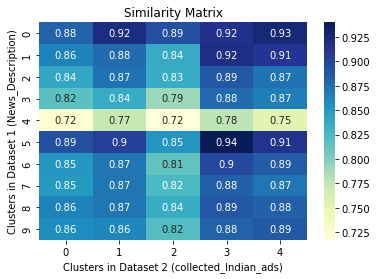

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("Clusters in Dataset 2 (collected_Indian_ads)")
plt.ylabel("Clusters in Dataset 1 (News_Description)")
plt.title("Similarity Matrix")
plt.show()


In [23]:
import pickle

In [24]:
with open('name.pkl','wb') as file:
    pickle.dump(kmeans,file)

In [25]:
with open('ad.pkl','wb') as file:
    pickle.dump(kmeans1,file)